In [85]:
import pandas as pd
import numpy as np
from pathlib import Path
import sys
THIS_DIR = Path.cwd()
root = THIS_DIR
while root != root.parent and not (root / "src").is_dir():
    root = root.parent

src_dir = root / "src"
if not src_dir.is_dir():
    raise RuntimeError(f"Could not find 'src' dir starting from {THIS_DIR}")

sys.path.insert(0, str(src_dir))

from cellclass.processing import smooth_acg_gaussian
from cellclass.visualize import plot_acg_bar_raw_line_smooth

In [86]:
import pandas as pd
df = pd.read_parquet("../data/processed/VS67/features/VS67_2023-02-20_19-17-18_features.parquet")
print(df.shape)
print(df.columns.tolist())
print(df.head())
print(df.describe(include="all"))

# any missing values?
print(df.isna().sum().sort_values(ascending=False).head(20))

# QC flags distribution
qc_cols = [c for c in df.columns if c.startswith("qc_")]
print(df[qc_cols].mean())   # fraction True per flag

# obvious ranges
print(df[["fr_hz","cv2","refractory_ms_edge","burst_index","spk_duration_ms","spk_peaktrough_ms"]])

df.head(20)

summarize_df = df[["mouse","cell_id", "n_spikes","cv2","refractory_ms_edge","burst_index","acg_peak_latency_ms","spk_duration_ms","spk_asymmetry"]]

(7, 22)
['session_id', 'mouse', 'date', 'time', 'cell_id', 'n_spikes', 'fr_hz', 'cv2', 'refractory_ms_center', 'refractory_ms_edge', 'refractory_peak_ms_center', 'refractory_peak_ms_edge', 'refractory_bin_ms', 'burst_index', 'acg_peak_latency_ms', 'acg_peak_value', 'spk_duration_ms', 'spk_peaktrough_ms', 'spk_asymmetry', 'qc_min_spikes', 'qc_refractory', 'qc_waveform']
                 session_id mouse        date      time  cell_id  n_spikes  \
0  VS67_2023-02-20_19-17-18  VS67  2023-02-20  19-17-18       29      1579   
1  VS67_2023-02-20_19-17-18  VS67  2023-02-20  19-17-18       34      3225   
2  VS67_2023-02-20_19-17-18  VS67  2023-02-20  19-17-18       43     36615   
3  VS67_2023-02-20_19-17-18  VS67  2023-02-20  19-17-18       47      6841   
4  VS67_2023-02-20_19-17-18  VS67  2023-02-20  19-17-18       52      8292   

       fr_hz       cv2  refractory_ms_center  refractory_ms_edge  ...  \
0   0.921905  1.213370                   8.5                 8.0  ...   
1   1.882928 

In [87]:

import numpy as np
acg = np.load("../data/processed/acg/VS57_2022-12-18_18-51-04_acg_counts_bin1_win50.npz")
print(acg.files)
lags_ms = acg["lags_ms"]                  # (n_lags,)
cell_ids = acg["cell_ids"]                # (n_cells,)
acg_counts = acg["acg_counts"]            # (n_lags, n_cells)
acg_smooth = acg["acg_counts_smooth"]      # (n_lags, n_cells)



['lags_ms', 'cell_ids', 'acg_counts', 'acg_counts_smooth_boxcar_ms', 'acg_counts_smooth', 'acg_bin_ms', 'acg_window_ms']


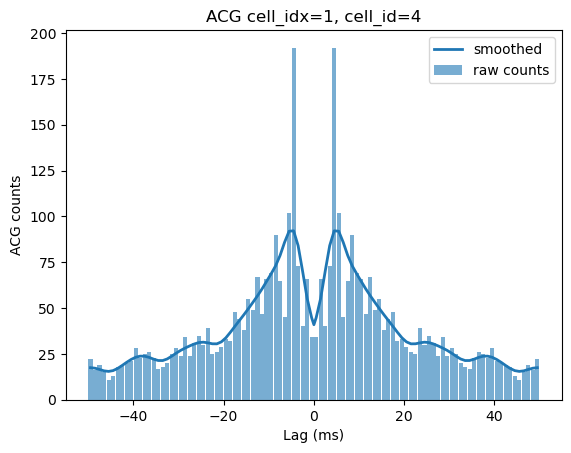

In [88]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


plot_acg_bar_raw_line_smooth(lags_ms, acg_counts, acg_smooth, cell_ids=cell_ids, cell_idx=1, show_negative=True)

